In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#  read the dataset
df = pd.read_csv("krisnaik_linear_regression_data.csv")
df.head()

,weight,height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'height')

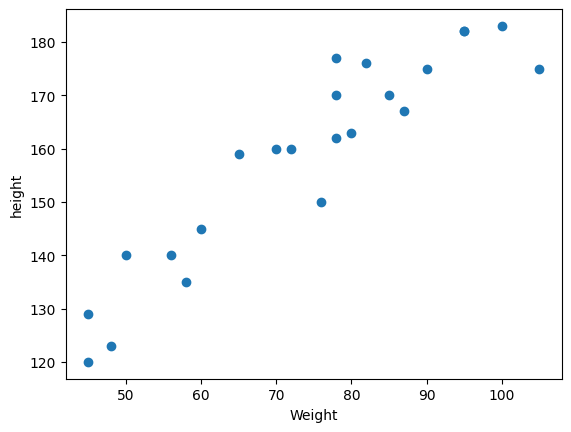

In [3]:
plt.scatter(df['weight'],df['height'])
plt.xlabel("Weight")
plt.ylabel("height")



In [14]:
## divide our dataset into independent and dependent features
x = df[['weight']]
y = df['height']

In [15]:
from sklearn.model_selection import train_test_split


In [16]:
## train test splitting our data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [17]:
x.shape

(23, 1)

In [18]:
x_train.shape

(18, 1)

In [19]:
x_test.shape

(5, 1)

In [20]:
## standardization the dataset train on independent data
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()

In [23]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [24]:
## train the linear regrtession model 
from sklearn.linear_model import LinearRegression

In [25]:
model_lr = LinearRegression(n_jobs=-1)
model_lr

LinearRegression(n_jobs=-1)

In [32]:
model_lr.fit(x_train_scaled,y_train)

LinearRegression(n_jobs=-1)

In [33]:
print("slope or coefficient of weight is",model_lr.coef_)
print("intercept ",model_lr.intercept_)

slope or coefficient of weight is [17.03440872]
intercept  157.5


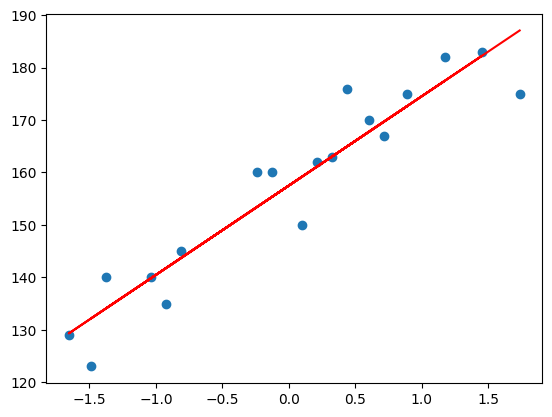

In [36]:
plt.scatter(x_train_scaled,y_train)
plt.plot(x_train_scaled,model_lr.predict(x_train_scaled),"r")

## prediction of train data
prediction of height output =  intercept + coef_(weights)
y_pred_train = 17.034(x_train_scaled)  + 157.5

## prediction of test data 
prediction of height output =  intercept + coef_(weights)
y_pred_test =  17.034(x_test_scaled)  + 157.5


In [37]:
y_pred_test = model_lr.predict(x_test_scaled)

In [39]:
y_pred_test,y_test

(array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: height, dtype: int64)

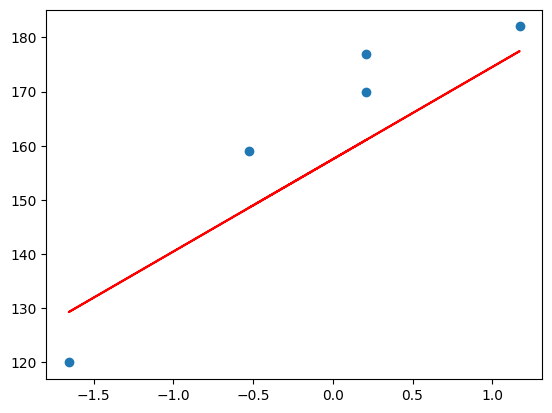

In [41]:
plt.scatter(x_test_scaled,y_test)
plt.plot(x_test_scaled,model_lr.predict(x_test_scaled),"r")

## Performance metrics 
## MSE ,MAE , RMSE
## R Squared Error , Adjusted R Squared Error


In [42]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [43]:
mse = mean_squared_error(y_test,y_pred_test)
mae = mean_absolute_error(y_test,y_pred_test)
rmse = np.sqrt(mse)
print("MSE",mse)
print("MAE",mae)
print("RMSE",rmse)

MSE 109.77592599051664
MAE 9.822657814519232
RMSE 10.477400726827081


## R squared 
Formula 
**R^2 = 1 - SSR/SST**

R^2 = coefficient of determination

SSR = sum of  squares  of  residuals

SST = total sum of squares

In [44]:
from sklearn.metrics import r2_score

In [45]:
score = r2_score(y_test,y_pred_test)
print("R Squared value",score)

R Squared value 0.776986986042344


## Adjusted R squared


** Adjusted R2  = 1 - [(1-R2)*(n-1)/(n-k-1)] **
where:

R2 : the R2 of the model

n: the number of obsevations

k: the number of predictor variables

In [46]:
## displaying adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test_scaled.shape[1] - 1)

0.7026493147231252

In [47]:
model_lr

LinearRegression(n_jobs=-1)

In [48]:
## new data point weight is  80
scaled_weight = scaler.transform([[80]])
scaled_weight

C:\Users\Piyush\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [51]:
print("the height prediction for weight 80 kg",model_lr.predict([scaled_weight[0]]))

the height prediction for weight 80 kg [163.01076266]


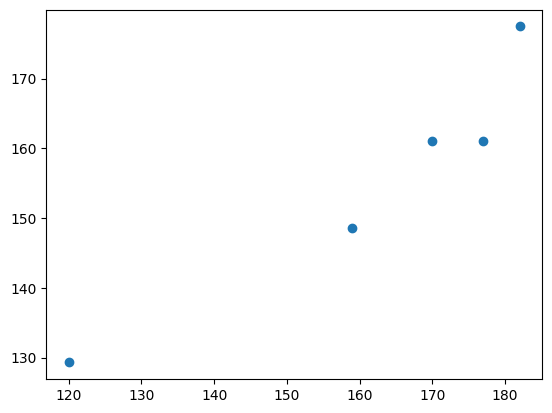

In [52]:
## Assumptions 
## plot a scatter plot fr the prediction
plt.scatter(y_test,y_pred_test)

In [53]:
## residuals
residuals = y_test - y_pred_test
residuals

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: height, dtype: float64

C:\Users\Piyush\AppData\Local\Temp\ipykernel_41264\3500142161.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,kde=True)


<Axes: xlabel='height', ylabel='Density'>

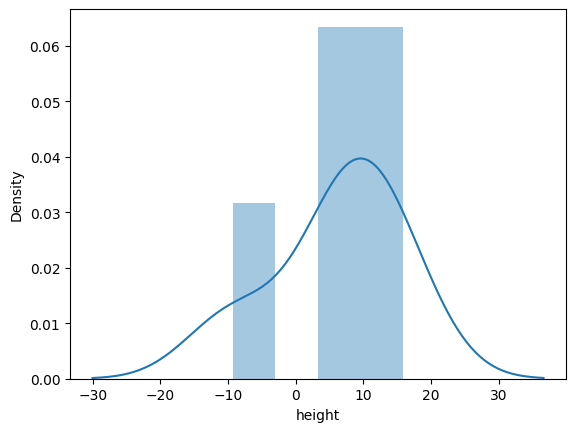

In [54]:
##  plot this residuals
import seaborn as sns
sns.distplot(residuals,kde=True)

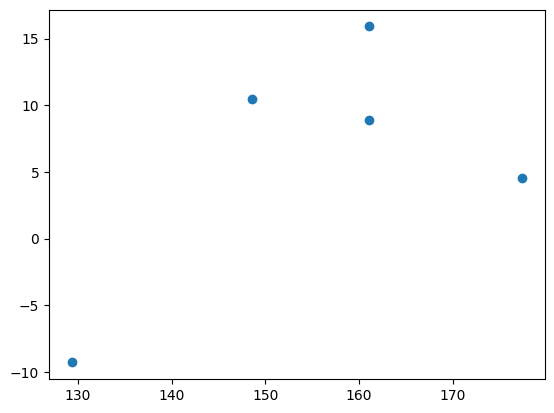

In [55]:
## Scatter plot with respect to prediction and residuals
## uniform distribution

plt.scatter(y_pred_test,residuals)